In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\athar\OneDrive\Desktop\ML CAS\Used_Car_Price_Prediction\car data.csv')
print(df.head())
print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

#Data Cleaning

In [5]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(299, 9)

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.drop('Car_Name',axis = 1,inplace = True)

In [13]:
object_data = df.select_dtypes(include ='object')

In [14]:
object_data

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [15]:
numeric_data =  df.select_dtypes(exclude ='object')

#Data Visualization

In [16]:
for column in object_data.columns:
    print(df[column].value_counts().reset_index(),'\n')
  

  Fuel_Type  count
0    Petrol    239
1    Diesel     58
2       CNG      2 

  Selling_type  count
0       Dealer    193
1   Individual    106 

  Transmission  count
0       Manual    260
1    Automatic     39 



In [ ]:
import seaborn as sns
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()
    

In [27]:
for column in object_data.columns:
    print(df[column].value_counts().reset_index(),'\n')

  Fuel_Type  count
0    Petrol    239
1    Diesel     58
2       CNG      2 

  Selling_type  count
0       Dealer    193
1   Individual    106 

  Transmission  count
0       Manual    260
1    Automatic     39 



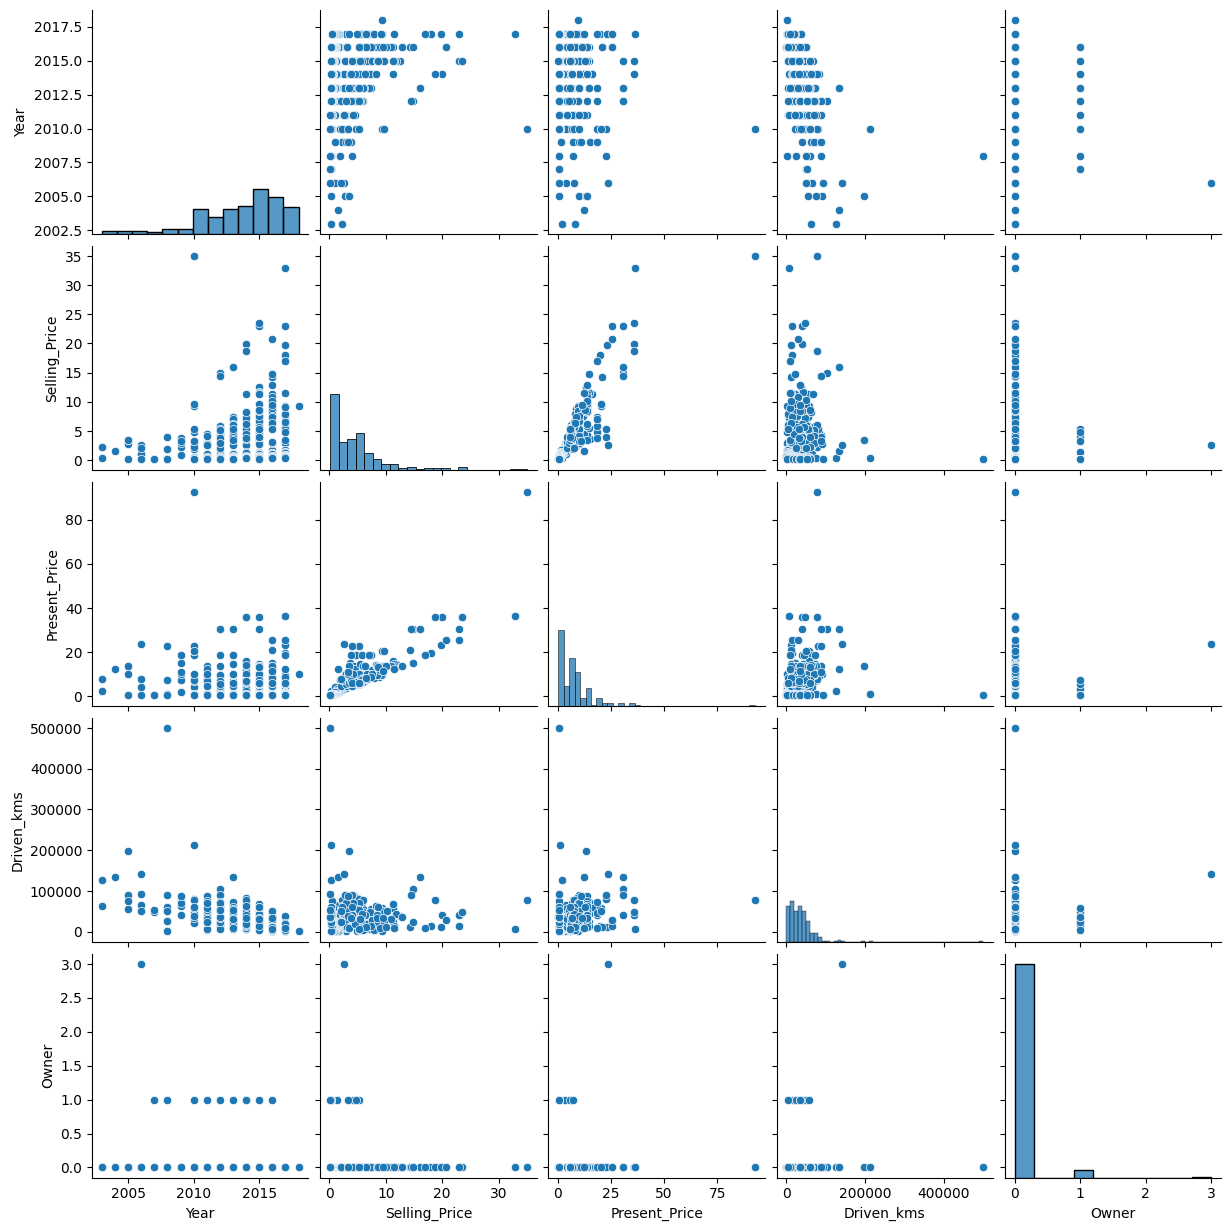

In [28]:
sns.pairplot(df)

In [29]:
df['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64

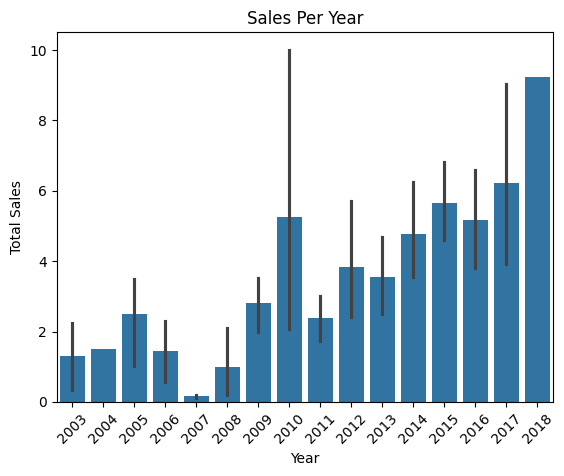

In [30]:
sns.barplot(x='Year',y='Selling_Price', data=df)
plt.title('Sales Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

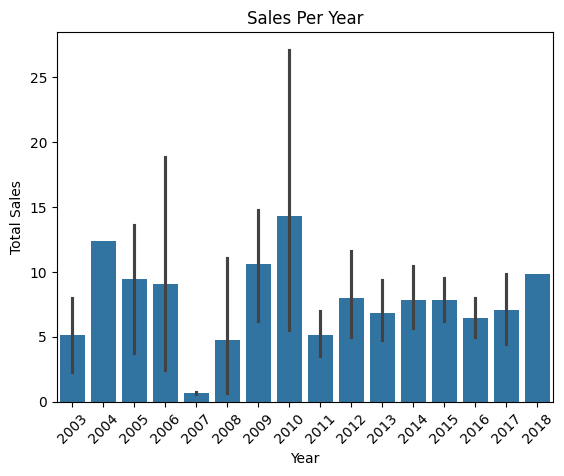

In [31]:
sns.barplot(x='Year',y='Present_Price', data=df)
plt.title('Sales Per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

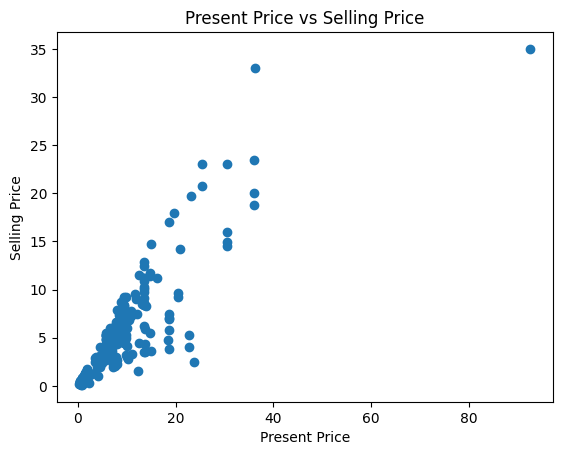

In [32]:
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

In [33]:
Price_Difference = df['Present_Price'] - df['Selling_Price']
Price_Difference

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
       ... 
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 299, dtype: float64

#Convert Object Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in object_data.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(le.classes_)

['CNG' 'Diesel' 'Petrol']
['Dealer' 'Individual']
['Automatic' 'Manual']


In [36]:
X =df.drop('Selling_Price',axis = 1)
y = df['Selling_Price']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

In [43]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model accuracy:", score)

Model accuracy: 0.8420034547893502


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)  # Optional

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 1.1779
MSE: 3.9834
RMSE: 1.9958
R² Score: 0.8420


In [49]:


# Fit the model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Coefficients as DataFrame
cdf = pd.DataFrame(LR.coef_, index=X.columns, columns=['Coef'])
cdf = cdf.reset_index().rename(columns={'index': 'Feature'})

# Display
print(cdf)


         Feature       Coef
0           Year   6.481589
1  Present_Price  38.593393
2     Driven_kms  -1.774873
3      Fuel_Type  -3.071034
4   Selling_type  -1.165245
5   Transmission  -1.411627
6          Owner  -1.851978


In [ ]:
import joblib

# Assuming you already have a trained model named `model`
# and a fitted TfidfVectorizer named `vectorizer`
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
